In [1]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [2]:
transforms_train = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root="./dataset", train=True, download=True, transform=transforms_train)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [3]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

In [5]:
learning_rate = 1e-3
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [6]:
import time

n_epochs = 100
start_time = time.time()

for epoch in range(n_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1).cuda()

        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'[Epoch {epoch + 1:3d}/{n_epochs}] [Loss: {loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]')
    if epoch % 10 == 9:
        pic = to_img(output.cpu().data)
        save_image(pic, f'image_{epoch+1}.png')

torch.save(model.state_dict(), './autoencoder.pth')

[Epoch   1/100] [Loss: 0.202657] [Elapsed time: 13.30s]
[Epoch   2/100] [Loss: 0.164062] [Elapsed time: 26.45s]
[Epoch   3/100] [Loss: 0.151089] [Elapsed time: 39.75s]
[Epoch   4/100] [Loss: 0.156792] [Elapsed time: 52.91s]
[Epoch   5/100] [Loss: 0.158423] [Elapsed time: 66.17s]
[Epoch   6/100] [Loss: 0.150438] [Elapsed time: 79.26s]
[Epoch   7/100] [Loss: 0.153870] [Elapsed time: 92.62s]
[Epoch   8/100] [Loss: 0.160013] [Elapsed time: 105.81s]
[Epoch   9/100] [Loss: 0.152280] [Elapsed time: 119.11s]
[Epoch  10/100] [Loss: 0.143139] [Elapsed time: 132.46s]
[Epoch  11/100] [Loss: 0.131899] [Elapsed time: 145.70s]
[Epoch  12/100] [Loss: 0.141360] [Elapsed time: 159.22s]
[Epoch  13/100] [Loss: 0.148285] [Elapsed time: 172.78s]
[Epoch  14/100] [Loss: 0.126952] [Elapsed time: 186.23s]
[Epoch  15/100] [Loss: 0.136717] [Elapsed time: 199.64s]
[Epoch  16/100] [Loss: 0.121473] [Elapsed time: 213.05s]
[Epoch  17/100] [Loss: 0.127910] [Elapsed time: 226.53s]
[Epoch  18/100] [Loss: 0.139617] [Elap

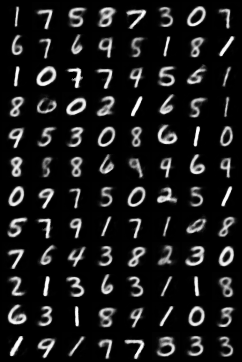

In [7]:
from IPython.display import Image

Image('image_100.png')